# Đề Bài 

Trên dữ liệu NYC:
link_FIle = /Users/myvo/Downloads/Cybersoft_DA12/DA12_DataSet_Cybersoft/data/nycflights.csv
1. Bài 1:
● Đếm số chuyến bay trễ của các sân bay (cột ‘origin’).
● Tương tự, đếm số chuyến bay không trễ của các sân bay.
● Tạo bảng hiển thị số chuyến bay trễ vs. không trễ.
● Vẽ lên biểu đồ.

2. Bài 2:
● Thực hiện tương tự với các hãng hàng không (cột ‘carrier’).

3. Bài 3:
● Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình của các hãng.
● Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình từ các sân bay.
● Vẽ các kết quả lên biểu đồ.

4. Bài 4:
● Tính tổng, trung bình, mean, median của quãng đường bay của từng hãng (cột distance).

In [77]:
# Bài 1
## 1a. Đếm số chuyến bay trễ của các sân bay (cột ‘origin’)

import pandas as pd
import numpy as np

file_path = '/Users/myvo/Downloads/Cybersoft_DA12/DA12_DataSet_Cybersoft/data/nycflights.csv'
# Use pandas to read data from file
file_info = pd.read_csv(file_path)

# Read data in column origin, dep_delay from file
data = file_info[['origin', 'dep_delay']]

# Drop NaN data
clean_data = data.dropna(axis = 0, how = "any").reset_index(drop = True)
display(clean_data)

# Get data with condition when 'dep_delay' > 0
df = clean_data.loc[(clean_data.dep_delay > 0)]
# Use groupby() to get unique data from 'origin' column
late_dep = df.groupby(['origin']).sum()
display("Numbers of delay flights",late_dep)


,origin,dep_delay
0,EWR,2.0
1,LGA,4.0
2,JFK,2.0
3,JFK,-1.0
4,LGA,-6.0
...,...,...
328516,JFK,-5.0
328517,JFK,-10.0
328518,JFK,-5.0
328519,JFK,12.0


'Numbers of delay flights'

,dep_delay
origin,
EWR,2055092.0
JFK,1599144.0
LGA,1402547.0


In [79]:
## 1b. Tương tự, đếm số chuyến bay không trễ của các sân bay. 

# Get data with condition when 'dep_delay' <= 0
dp = clean_data.loc[(clean_data.dep_delay <= 0)]
display(dp)
# Use groupby() to get unique data from 'origin' column
not_late_dep = dp.groupby(['origin']).sum()
display("Numbers of early flights",abs(not_late_dep))

,origin,dep_delay
3,JFK,-1.0
4,LGA,-6.0
5,EWR,-4.0
6,EWR,-5.0
7,LGA,-3.0
...,...,...
328515,JFK,-8.0
328516,JFK,-5.0
328517,JFK,-10.0
328518,JFK,-5.0


'Numbers of early flights'

,dep_delay
origin,
EWR,278457.0
JFK,273880.0
LGA,352246.0


In [101]:
# ● 1c. Tạo bảng hiển thị số chuyến bay trễ vs. không trễ
a = pd.concat((late_dep, abs(not_late_dep)), axis = 1)
a.columns = ["Delay Flights","Not Late Flights" ]
display(a)

,Delay Flights,Not Late Flights
origin,,
EWR,2055092.0,278457.0
JFK,1599144.0,273880.0
LGA,1402547.0,352246.0


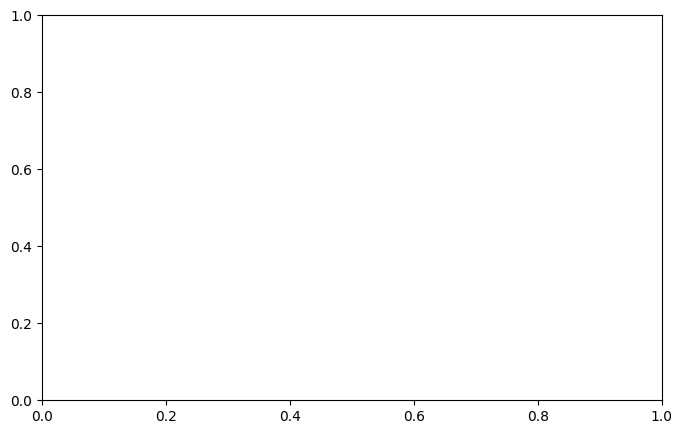

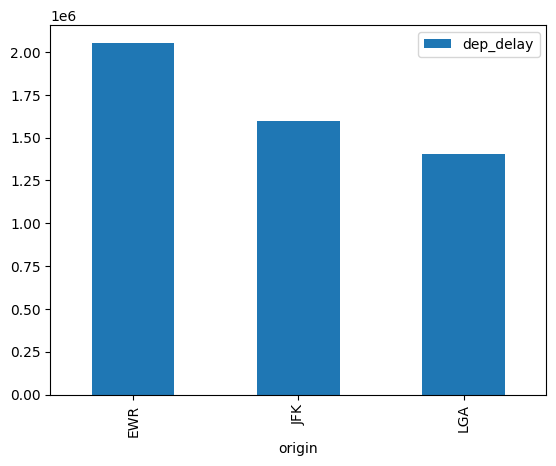

/var/folders/sh/d6z8kkmx6k78_xyfycb85jwr0000gn/T/ipykernel_50772/579238795.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(1,11),rotation='horizontal')


[Text(0, 0.0, '1'),
 Text(0, 0.2, '2'),
 Text(0, 0.4, '3'),
 Text(0, 0.6000000000000001, '4'),
 Text(0, 0.8, '5'),
 Text(0, 1.0, '6')]

In [110]:
# ● 1d. Vẽ lên biểu đồ
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
late_dep.plot.bar()
plt.show()
ax.set_yticklabels(range(1,11),rotation='horizontal')

# fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot()

# df_b.plot.bar(ax=ax, legend='reverse', width=0.75)

# ax.set_xticklabels(range(1,11), rotation='horizontal')
# ax.legend(loc=[1.02,0.81])
# plt.show()
# plt.close("all")


In [143]:
# Bài 2: ● Thực hiện tương tự với các hãng hàng không (cột ‘carrier’).
# Get data from carrier and dep_delay columns
data = file_info[['carrier', 'dep_delay']]
drop_nan2 = data.dropna(axis = 0, how = "any").reset_index(drop = True)
display(drop_nan2)

# Get unique data from carrier and condition with dep_delay>0(late flights)
a = drop_nan2.loc[(drop_nan2.dep_delay > 0)]
dep_delay = a.groupby("carrier").sum()

# Get unique data from carrier and condition with dep_delay<=0(not late flights)
b = drop_nan2.loc[(drop_nan2.dep_delay <= 0)]
not_dep_delay = b.groupby("carrier").sum()

# Combine 2 columns in 1 table and rename columns name
c = pd.concat((dep_delay, abs(not_dep_delay)), axis = 1)
c.columns = ('Delay Flights', 'On-time Flights')
display(c)

,carrier,dep_delay
0,UA,2.0
1,UA,4.0
2,AA,2.0
3,B6,-1.0
4,DL,-6.0
...,...,...
328516,B6,-5.0
328517,B6,-10.0
328518,B6,-5.0
328519,B6,12.0


,Delay Flights,On-time Flights
carrier,,
9E,345522.0,345522.0
AA,377714.0,377714.0
AS,7083.0,7083.0
B6,853387.0,853387.0
DL,570017.0,570017.0
EV,1164581.0,1164581.0
F9,15392.0,15392.0
FL,67526.0,67526.0
HA,3094.0,3094.0
